<a href="https://colab.research.google.com/github/techie11manisha/Linear-Regression-PCA-LDA/blob/main/A10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

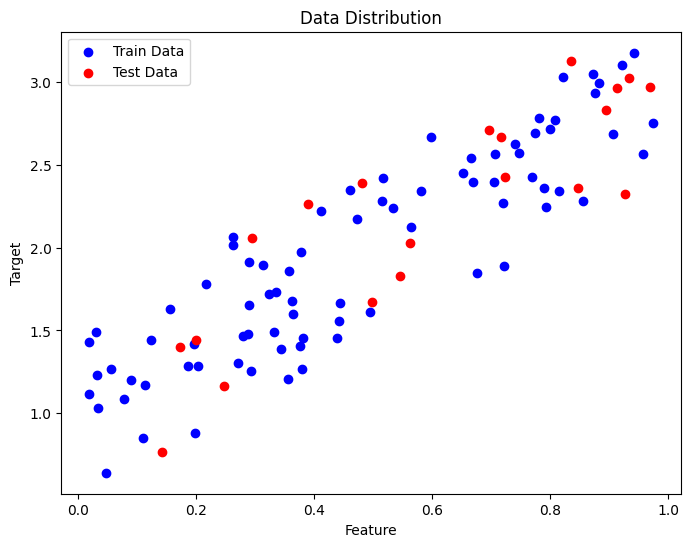

Estimated Coefficients: [1.97349411]
Intercept: 1.0192418104302992
Coefficient of Determination (R^2): 0.7643439835467629


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, 0].values.reshape(-1, 1)  # Feature
y = data.iloc[:, 1].values  # Target

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Data Distribution')
plt.legend()
plt.show()

# Fit a linear model using the train set
model = LinearRegression()
model.fit(X_train, y_train)

# Report the estimated coefficients and intercept
print("Estimated Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Report the coefficient of determination (R^2) of the prediction
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r2)


Explained variance for all the components:
Component 1: 0.7296
Component 2: 0.2285
Component 3: 0.0367
Component 4: 0.0052

Principal Components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


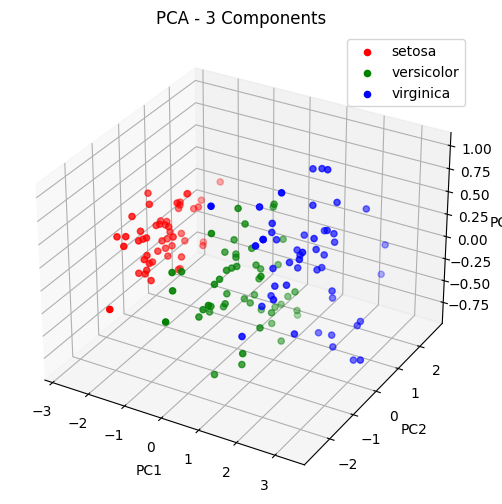

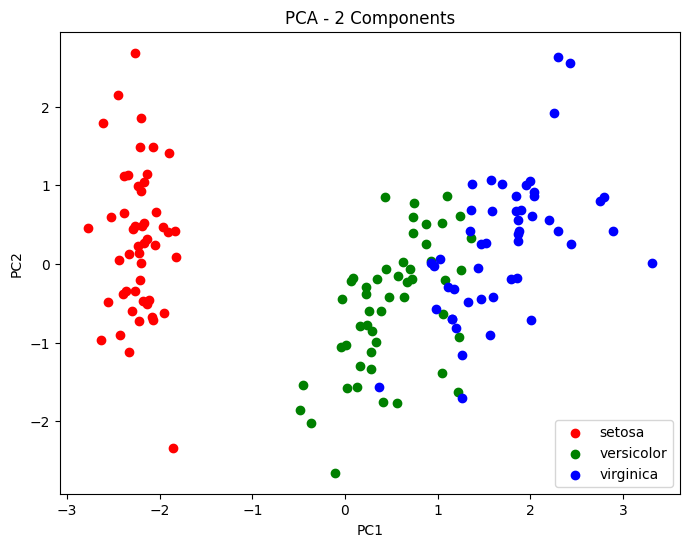

Explained variance for the first two components in 2D:
Component 1: 0.7296
Component 2: 0.2285

Explained variance for the first two components in 3D:
Component 1: 0.7296
Component 2: 0.2285


In [6]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance for all the components
explained_variance = pca.explained_variance_ratio_
print("Explained variance for all the components:")
for i, ev in enumerate(explained_variance):
    print(f"Component {i+1}: {ev:.4f}")

# Identify the principal components
principal_components = pca.components_
print("\nPrincipal Components:")
print(principal_components)

# Use PCA to reduce the dimensionality to 3 and plot the transformed data in a 3-D plot indicating each class
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], c=c, label=target_name)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3 Components')
ax.legend()
plt.show()

# Use PCA to reduce the dimensionality to 2 and plot the transformed data in a 2-D plot indicating each class
plt.figure(figsize=(8, 6))
for c, i, target_name in zip('rgb', [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=target_name)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2 Components')
plt.legend()
plt.show()

# Report the explained variance for the first two components in both cases
explained_variance_2d = pca.explained_variance_ratio_[:2]
print("Explained variance for the first two components in 2D:")
print(f"Component 1: {explained_variance_2d[0]:.4f}")
print(f"Component 2: {explained_variance_2d[1]:.4f}")

explained_variance_3d = pca.explained_variance_ratio_[:3]
print("\nExplained variance for the first two components in 3D:")
print(f"Component 1: {explained_variance_3d[0]:.4f}")
print(f"Component 2: {explained_variance_3d[1]:.4f}")


Estimated coefficients: [[-1.72433733  2.3749168 ]
 [ 3.50682118 -0.87987968]]
Intercept: [ -3.24445885  -5.31729915 -30.71971132]


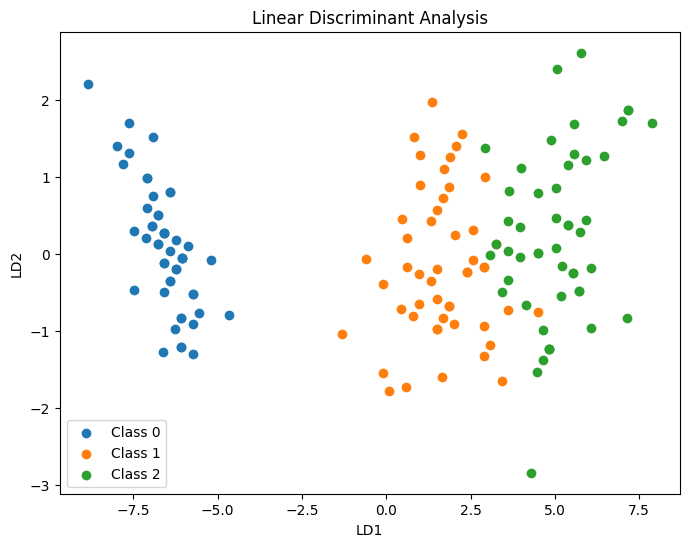

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Choose any 2 out of 4 features
selected_features = [0, 2]  # Choosing the first and third features
X_selected = X[:, selected_features]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Report the estimated coefficients, intercept, class priors, class means, and within-class scatter matrix
# Report the estimated coefficients, intercept, class priors, class means, and within-class scatter matrix
# Report the estimated coefficients, intercept, class priors, class means, and within-class scatter matrix
coefficients = lda.scalings_
intercept = lda.intercept_
print("Estimated coefficients:", coefficients)
print("Intercept:", intercept)



# Transform the data according to LDA coefficients
X_transformed = lda.transform(X_selected)

# Plot the transformed data in a 2-D graph
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_transformed[y == label, 0], X_transformed[y == label, 1], label=f'Class {label}')

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Linear Discriminant Analysis')
plt.legend()
plt.show()
